## GRIPFEB22 - The Spark Foundation- Data Science & Business Analytics Internship

## Task_2 : Prediction using unsupervised ML

## Problem statement: From the give 'iris' dataset, predict the optimum no. of clusters and represent it visually

*This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

*The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

## By : Nagraj Desai

## Importing the libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Loading Dataset 

In [2]:
# load dataset
iris = load_iris()

Dataset   
https://bit.ly/3kXTdox

## Storing Features and Target of Iris dataset

In [16]:
X = iris.data 
y = iris.target

In [26]:
X.shape

(150, 4)

In [ ]:
print(X)

In [23]:
y.shape

(150,)

In [ ]:
print(y)

## Features Names

In [17]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Target Names

In [18]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Converting into Dataframe

In [27]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
# Description
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Using L-bow method to find the optimal number of clusters

C:\Users\vivo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


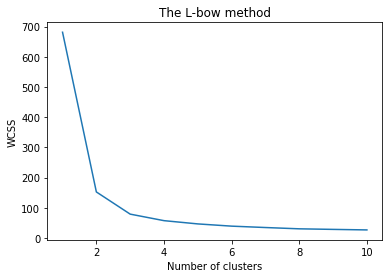

In [32]:
from sklearn.cluster import KMeans
# create a list to store wcss value
wcss = []

# change the no. of cluster from 1 to 10
# and from that select 1 value where slop decreases slowly
for i in range(1,11):
    kmean = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmean.fit(X)
    
    # .inertia gives the wcss value 
    wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The L-bow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In above graph after the 3 number of clusters the graph will decrease slowly so we take no. of clusters (K) = 3

## Train dataset for 3 clusters¶ 

In [33]:
kmean = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)

In [34]:
y_kmean = kmean.fit_predict(X)

## Visualising the clusters

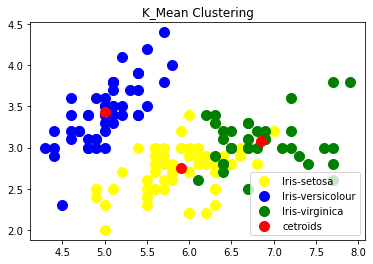

In [47]:
# take X from there X[(y_kmean's value which are equal to 0 to 4),(X variables 0th columb and 1st columb)]
# so the values are taken as
# eg.----> we have to make cluster 1
# take values from X and from columb 0 which are in 0th cluster from y_kmean
# take values from X and from columb 1 which are in 0th cluster from y_kmean

plt.scatter(X[y_kmean == 0,0], X[y_kmean == 0,1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmean == 1,0], X[y_kmean == 1,1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmean == 2,0], X[y_kmean == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

# plot centroids 
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s = 100, c = 'red' , label = 'cetroids')
plt.title('K_Mean Clustering')
plt.legend()
plt.show()